In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df= pd.read_csv("train.csv")

In [ ]:
test_df=pd.read_csv('test.csv')

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Viewing the null values


<Axes: >

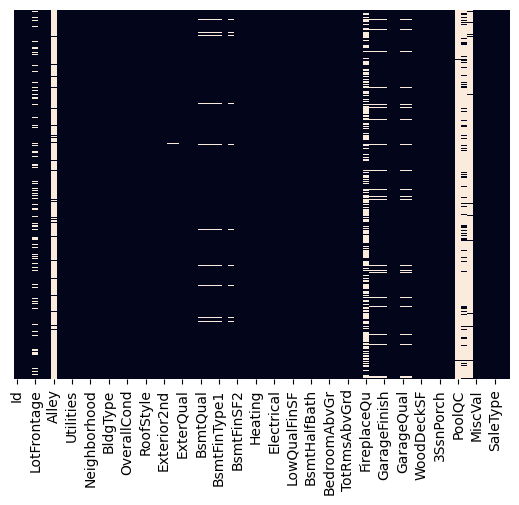

In [ ]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [ ]:
# print(train_df['PoolQC'].isnull().sum())
# print(train_df['MiscVal'].isnull().sum())
# print(train_df['FireplaceQu'].isnull().sum())
# print(train_df['FireplaceQu'].unique())
# print(train_df['MiscFeature'].isnull().sum())
# print(train_df['Alley'].isnull().sum())
# print(train_df['Fence'].isnull().sum())

In [ ]:
# len(train_df['FireplaceQu'].unique())

Number of different Unique values the features of train and test data have

In [ ]:
for i in train_df:
    if train_df[i].dtype=='object':
        print(i,len(train_df[i].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


In [ ]:
for i in test_df:
    if test_df[i].dtype=='object':
        print(i,len(test_df[i].unique()))

MSZoning 6
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 14
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 5
Functional 8
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 5
GarageCond 6
PavedDrive 3
PoolQC 3
Fence 5
MiscFeature 4
SaleType 10
SaleCondition 6


#### Conclusion: train_df and test_df is not having the same no of unique values so we apply mode on the missing values differently for the train and test data

In [ ]:
for i in train_df:
    if train_df[i].isnull().sum()>=1000:
        print(i)
        train_df=train_df.drop([i],axis=1)

Alley
PoolQC
Fence
MiscFeature


In [ ]:
train_df.shape

(1460, 77)

In [ ]:
# train_df=train_df.drop(['PoolQC'],axis=1)
# train_df=train_df.drop(['FireplaceQu'],axis=1)
# train_df=train_df.drop(['MiscFeature'],axis=1)
# train_df=train_df.drop(['Alley'],axis=1)
# train_df=train_df.drop(['Fence'],axis=1)

Identifying the columns that has atleast one NULL value "Object" columns

In [ ]:
# na_col.clear()
na_col=[]
for i in train_df:
    if train_df[i].dtype=='object':
        if train_df[i].notnull().all()==False:
            na_col.append(i)
print(na_col)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [ ]:
train_df['MasVnrType'].notnull().all()

False

For the float data type columns

In [ ]:
# clear(na_col2)
na_col2=[]
for i in train_df:
    if train_df[i].dtype=='float64':
        if train_df[i].notnull().all()==False:
            na_col2.append(i)
print(na_col2)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


<Axes: >

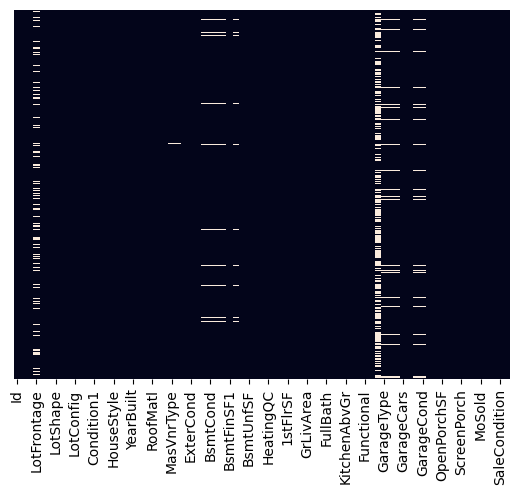

In [ ]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

Now the final work: Fill missing values with mode and mean

In [ ]:
for i in na_col:
    train_df[i]=train_df[i].fillna(train_df[i].mode()[0])

In [ ]:
for i in na_col2:
    train_df[i]=train_df[i].fillna(train_df[i].mean())

Vanishhhh

<Axes: >

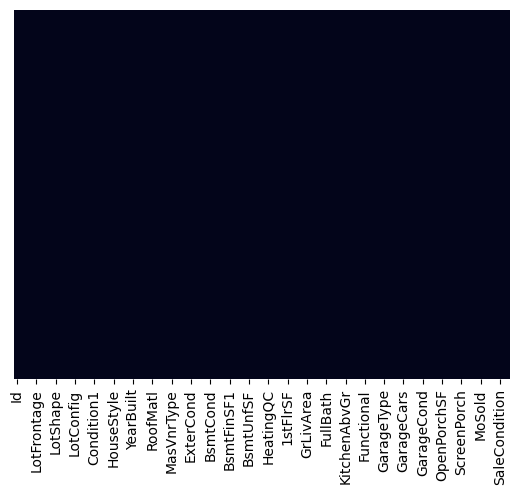

In [ ]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [ ]:
train_df.isnull().sum().sum()

0

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Test data EDA

In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test_df.isnull().sum().sum()

7000

<Axes: >

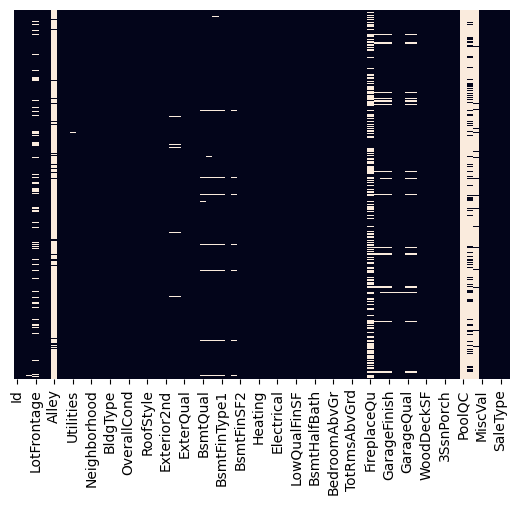

In [ ]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [ ]:
for i in train_df:
    if train_df[i].isnull().sum()>=1000:
        train_df=train_df.drop([i],axis=1)

In [ ]:
test_df.shape

(1459, 80)

In [ ]:
for i in test_df:
    if test_df[i].isnull().sum()>=1000:
        print(i)
        test_df=test_df.drop([i],axis=1)

Alley
PoolQC
Fence
MiscFeature


In [ ]:
test_df.shape

(1459, 76)

In [ ]:
# na_col.clear()
na_col_test=[]
for i in test_df:
    if test_df[i].dtype=='object':
        if test_df[i].notnull().all()==False:
            na_col_test.append(i)
print(na_col)
# na_col2.clear()
na_col2_test=[]
for i in test_df:
    if test_df[i].dtype=='float64':
        if test_df[i].notnull().all()==False:
            na_col2_test.append(i)
print(na_col2)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
for i in na_col_test:
    test_df[i]=test_df[i].fillna(test_df[i].mode()[0])
for i in na_col2_test:
    test_df[i]=test_df[i].fillna(test_df[i].mean())

<Axes: >

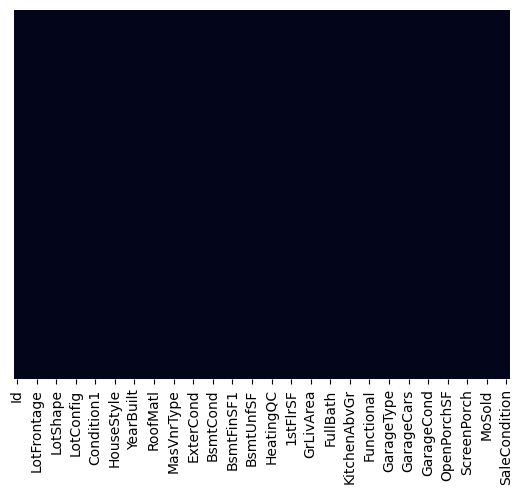

In [ ]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [ ]:
test_df.isnull().sum().sum()

0

In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
print(len(na_col))
print(len(na_col2))
print(len(na_col_test))
print(len(na_col2_test))
print(train_df.shape)
print(test_df.shape)

12
3
18
11
(1460, 77)
(1459, 76)


In [ ]:
print(train_df.columns)
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [ ]:
1460+1459

2919

In [ ]:
final_df=pd.concat([train_df,test_df]).drop_duplicates(keep=False)

In [ ]:
final_df.shape

(2919, 77)

In [ ]:
final_df.isnull().sum().sum()

1459

In [ ]:
cat_col=[]
for i in final_df:
  if final_df[i].dtype=='object':
    cat_col.append(i)
print(len(cat_col))

39


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [ ]:
def category_oh_multicols(multicols):
    df_final=final_df
    i=0
    for fields in multicols:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    
    df_final=pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [ ]:
main_df=final_df.copy()

In [ ]:
final_df=category_oh_multicols(cat_col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
main_df.shape

(2919, 77)

In [ ]:
final_df.shape

(2919, 238)

In [ ]:
for i in final_df:
  print(i)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
FV
RH
RL
RM
Pave
IR2
IR3
Reg
HLS
Low
Lvl
NoSeWa
CulDSac
FR2
FR3
Inside
Mod
Sev
Blueste
BrDale
BrkSide
ClearCr
CollgCr
Crawfor
Edwards
Gilbert
IDOTRR
MeadowV
Mitchel
NAmes
NPkVill
NWAmes
NoRidge
NridgHt
OldTown
SWISU
Sawyer
SawyerW
Somerst
StoneBr
Timber
Veenker
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNe
RRNn
2fmCon
Duplex
Twnhs
TwnhsE
1.5Unf
1Story
2.5Fin
2.5Unf
2Story
SFoyer
SLvl
Gable
Gambrel
Hip
Mansard
Shed
CompShg
Membran
Metal
Roll
Tar&Grv
WdShake
WdShngl
AsphShn
BrkComm
BrkFace
CBlock
CemntBd
HdBoard
ImStucc
MetalSd
Plywood
Stone
Stucco
VinylSd
Wd Sdng
WdShing
Brk Cmn
CmentBd
Other
Wd Shn

In [ ]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(2919, 178)

In [ ]:
final_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [ ]:
1460+1459

2919

In [ ]:
df_train=final_df.iloc[:1460,:]
df_test=final_df.iloc[1460:,:]

In [ ]:
df_test.shape

(1459, 178)

In [ ]:
train_col=df_train.columns
test_col=df_test.columns

Standard Scalling of the data


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df_train=scaler.fit_transform(df_train)
df_test=scaler.transform(df_test)

In [ ]:
df_train=pd.DataFrame(df_train,columns=train_col)
df_test=pd.DataFrame(df_train,columns=test_col)

In [ ]:
# df_test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']
X_test=df_test.drop(['SalePrice'],axis=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1460, 177)
(1460,)
(1459, 177)


In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

**Prediction and selection of the model(Hyperparameter Tuning)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## Hyper parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
model=rf.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([128782.58, 152799.25, 179285.24, ..., 153990.18, 113233.  ,
       227092.38])

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
# random_cv.fit(X_train,y_train)

In [ ]:
df=pd.read_csv('sample_submission.csv')
df

,Id,SalePrice
0,1461,131406.00
1,1462,157943.57
2,1463,180818.42
3,1464,182134.32
4,1465,203232.02
...,...,...
1454,2915,85883.00
1455,2916,86793.00
1456,2917,155392.43
1457,2918,116215.50


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**Applying ANN to my model to increase the accuracy score**> Indented block



In [ ]:
# # Importing the Keras libraries and packages
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from kerastuner.tuners import RandomSearch 

### Splitting the train,test split to calculate the accuracy in ann

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 178)
(1459, 178)


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# !pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
# import kerastuner as kt

<ipython-input-69-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
# def build_model(hp):
#   model=Sequential()
#   model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=176))
#   model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
#   model.add(Dense(1,kernel_initializer='he_uniform'))
#   optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
#   model.compile(optimizer=optimizer,loss='MeanSquaredError',metrics=['accuracy'])
#   return model

In [ ]:
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5)

In [ ]:
# tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test)) 

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 00m 22s


In [ ]:
# tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adadelta'}

In [ ]:
# model= tuner.get_best_models(num_models=1)[0]

In [ ]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
764,765,120,30.000000,9549,8,5,1995,1996,0.0,437.0,...,0,0,0,0,1,0,0,0,1,0
1238,1239,20,63.000000,13072,6,5,2005,2005,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
33,34,20,70.000000,10552,5,5,1959,1959,0.0,1018.0,...,0,0,0,0,1,0,0,0,1,0
758,759,160,24.000000,2280,7,5,1999,1999,360.0,549.0,...,0,0,0,0,1,0,0,0,1,0
1049,1050,20,60.000000,11100,4,7,1946,2006,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,167,20,70.049958,10708,5,5,1955,1993,0.0,379.0,...,0,0,0,0,0,0,0,0,1,0
654,655,20,91.000000,10437,8,6,1995,1995,660.0,1696.0,...,0,0,0,0,1,0,0,0,1,0
1275,1276,90,95.000000,11345,5,5,1948,1950,567.0,220.0,...,0,0,0,0,1,0,0,0,1,0
729,730,30,52.000000,6240,4,5,1925,1950,0.0,152.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_train

764     270000.0
1238    142500.0
33      165500.0
758     179400.0
1049     84900.0
          ...   
166     190000.0
654     350000.0
1275    137000.0
729     103000.0
69      225000.0
Name: SalePrice, Length: 1095, dtype: float64

In [ ]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1161,1162,20,70.049958,14778,6,7,1954,2006,72.0,728.0,...,0,0,0,0,1,0,0,0,1,0
789,790,60,70.049958,12205,6,8,1966,2007,157.0,568.0,...,0,0,0,0,1,0,0,0,1,0
331,332,20,70.000000,8176,5,6,1958,1992,0.0,846.0,...,0,0,0,0,1,0,0,0,1,0
194,195,20,60.000000,7180,5,7,1972,1972,0.0,390.0,...,0,0,0,0,1,0,0,0,1,0
543,544,120,34.000000,4058,7,5,1998,1998,182.0,584.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,60,93.000000,11999,8,5,2003,2004,340.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1205,1206,20,90.000000,14684,7,7,1990,1991,234.0,485.0,...,0,0,0,0,1,0,0,0,1,0
298,299,60,90.000000,11700,6,6,1968,1968,365.0,384.0,...,0,0,0,0,1,0,0,0,1,0
1075,1076,70,75.000000,13125,7,6,1940,1984,0.0,410.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_test

1161    224000.0
789     187500.0
331     139000.0
194     127000.0
543     133000.0
          ...   
926     285000.0
1205    271900.0
298     175000.0
1075    219500.0
809     106000.0
Name: SalePrice, Length: 365, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

In [ ]:
svr=SVR()
lr= LogisticRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_pred,y_test)

0.8338046150674701

In [ ]:
# svr.fit(X_train,y_train)
# y_pred=svr.predict(X_test)
# r2_score(y_pred,y_test)

-9624569.470748104

In [ ]:
# lr.fit(X_train,y_train)
# y_pred=lr.predict(X_test)
# r2_score(y_pred,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.31728971510966386

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: ignored

Randomized search CV

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/pytho

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': 8,
 'bootstrap': True}

In [ ]:
df_test=pd.read_csv('test.csv')
df_test.isnull().sum().sum()

7000

**Test DataFrame EDA**

In [ ]:
print(X_test.shape)
print(df_test.shape)

(365, 177)
(1459, 178)


In [ ]:
y_pred=rf_grid.predict(X_test)
r2_score(y_pred,y_test)

0.830244059981284

In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5664      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,753
Trainable params: 6,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
35/35 [==============================] - 1s 8ms/step - loss: 37147914240.0000 - accuracy: 0.0000e+00 - val_loss: 37772697600.0000 - val_accuracy: 0.0000e+00
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 37142016000.0000 - accuracy: 0.0000e+00 - val_loss: 37767065600.0000 - val_accuracy: 0.0000e+00
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 37135953920.0000 - accuracy: 0.0000e+00 - val_loss: 37761372160.0000 - val_accuracy: 0.0000e+00
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 37129826304.0000 - accuracy: 0.0000e+00 - val_loss: 37755518976.0000 - val_accuracy: 0.0000e+00
Epoch 11/100
35/35 [==============================] - 0s 3ms/step - loss: 37123518464.0000 - accuracy: 0.0000e+00 - val_loss: 37749501952.0000 - val_accuracy: 0.0000e+00
Epoch 12/100
35/35 [==============================] - 0s 3ms/step - loss: 37117022208.0000 - accuracy: 0.0000e+00 - val_loss: 37743366144.0000 - val_accu

In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5664      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,753
Trainable params: 6,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# y_pred=model.predict(df_test.drop(['Id','SalePrice'],axis=1))

46/46 [==============================] - 0s 2ms/step


In [ ]:
# y_pred.shape

(1459, 1)

In [ ]:
df_test['SalePrice']

KeyError: ignored

In [ ]:
# df_test=df_test.drop(['SalePrice'],axis=1)
print(df_test.shape)
print(X_test.shape)

(1459, 177)
(365, 177)


In [ ]:
y_pred_final=rf_grid.predict(df_test)

In [ ]:
pred= pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
pd.read_csv('sample_submission.csv')

,Id,SalePrice
0,1461,131406.00
1,1462,157943.57
2,1463,180818.42
3,1464,182134.32
4,1465,203232.02
...,...,...
1454,2915,85883.00
1455,2916,86793.00
1456,2917,155392.43
1457,2918,116215.50
